# 9.1 number 21
+--------+--------+-----+
|  x_n   |  y_n   |  n  |
+--------+--------+-----+
|   1    |   1    |  0  |
| 1.1000 | 1.2000 |  1  |
| 1.2000 | 1.4640 |  2  |
| 1.3000 | 1.8154 |  3  |
| 1.4000 | 2.2874 |  4  |
| 1.5000 | 2.9278 |  5  |
|  ---   |  ---   | --- |
|   1    |   1    |  0  |
| 1.1000 | 1.2320 |  1  |
| 1.2000 | 1.5479 |  2  |
| 1.3000 | 1.9832 |  3  |
| 1.4000 | 2.5908 |  4  |
| 1.5000 | 3.4509 |  5  |
|  ***   |  ***   | *** |
| 1.1000 | 1.2320 |  1  |
| 1.2000 | 1.5077 |  2  |
| 1.3000 | 1.8757 |  3  |
| 1.4000 | 2.3716 |  4  |
| 1.5000 | 3.0468 |  5  |
+--------+--------+-----+


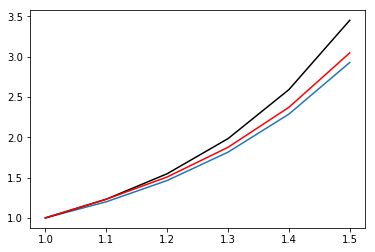

In [24]:
from prettytable import PrettyTable
import math
import numpy as np
import matplotlib.pyplot as plt
tbl = PrettyTable()
tbl.field_names = ["x_n", "y_n", "n"] 
tbl.float_format="1.4"

def derivative(x, y):
    return 2*x*y

def euler(x_n, y_n, h, target):
    solx = [x_n]
    soly = [y_n]

    n = 0
    tbl.add_row([x_n, y_n, n])
    while abs(x_n/target - 1) > 0.00001:
        n += 1
        y_new = y_n + h*derivative(x_n, y_n)
        x_n += h
        tbl.add_row([x_n, y_new, n])
        y_n = y_new
        solx.append(x_n)
        soly.append(y_new)
    return solx, soly

def imp_euler(x_n, y_n, h, target):
    solx = [x_n]
    soly = [y_n]

    n = 0
    tbl.add_row([x_n, y_n, n])
    while abs(x_n/target - 1) > 0.00001:
        n += 1
        y_nsplat = y_n + h*derivative(x_n, y_n)
        y_new = y_n+h*(derivative(x_n, y_n)+derivative(x_n+h, y_nsplat))/2
        x_n += h
        tbl.add_row([x_n, y_new, n]) 
        y_n = y_new
        solx.append(x_n)
        soly.append(y_new)
    return solx, soly

y_n = 1
x_n = 1
h = 0.1
target = 1.5
solx, soly = euler(x_n, y_n, h, target)
plt.plot(solx, soly)

tbl.add_row(["---","---","---"]) 

# h = 0.05
solx2, soly2 = imp_euler(x_n, y_n, h, target)
plt.plot(solx2, soly2, color="black")

tbl.add_row(["***","***","***"]) 
# naive way
fooy = [soly[0]]
foox = [solx[0]]
for i in range(1, len(solx)):
    y_new = soly[i-1]+h*(derivative(solx[i-1], soly[i-1])+derivative(solx[i-1]+h, soly[i]))/2
    tbl.add_row([solx[i], y_new, i])
    fooy.append(y_new)
    foox.append(solx[i])
plt.plot(foox, fooy, color="red")
    
print("# 9.1 number 21")
print(tbl)
plt.show()